# Steps

1. Importing of Libraries
2. Loading of dataset & creation data loaders
3. Building Model
4. Training & Evaluation of the Model

Step 1: Importing the libraries

In [2]:
# Libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from random import randint

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, AvgPool2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

# Step 2: Loading dataset and creation of data loaders

In [3]:
img_gen = ImageDataGenerator(rescale=1/255)

Data Loader : efficiently loading and preparing the training or testing data for the CNN model

In [4]:
train_loader = img_gen.flow_from_directory(
    directory = "archive/seg_train/seg_train", target_size = (128, 128), batch_size = 50, seed = 42, )

test_loader = img_gen.flow_from_directory(
    directory = "archive/seg_test/seg_test", target_size = (128, 128), batch_size = 50, seed = 42, )

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [5]:
train_loader.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [6]:
idx_to_classes = {val:key for key,val in dict(train_loader.class_indices).items()}

In [7]:
idx_to_classes

{0: 'buildings',
 1: 'forest',
 2: 'glacier',
 3: 'mountain',
 4: 'sea',
 5: 'street'}

# Step 3: Building the Model

Kernel Size: Uniform Spatial Dimension for input and output

Drop Out: To reduce overfitting

`Sequential` in the context of Keras refers to a linear stack of layers for building and defining neural network models.

In [8]:
model = Sequential()
#Covolution 1
model.add(Conv2D(32,
                 kernel_size = (3,3),
                 activation = "relu",
                 input_shape = (128, 128, 3)))
model.add(AvgPool2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

#Covolution 2
model.add(Conv2D(64,
                 kernel_size = (3,3),
                 activation = "relu"))
model.add(AvgPool2D(pool_size=(3,3)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Flatten & Linear Fully connected layers
model.add(Flatten())
model.add(Dense(32, activation = "relu"))
model.add(Dense(6, activation = "softmax"))

Optimizer "adam": providing effective and adaptive learning rates for training neural networks, which helps converge faster and handle various types of data.

In [9]:
model.compile(optimizer = "adam", loss = "categorical_crossentropy",
              metrics = ["accuracy"])

In [10]:
#Steps
train_steps = len(train_loader) # = (round(total_train_images / batch_size))
test_steps = len(test_loader) # = (round(total_test_images / batch_size))

In [11]:
train_metrics = model.fit_generator(
    generator = train_loader,
    steps_per_epoch=train_steps,
    epochs = 20,
    validation_data = test_loader,
    validation_steps = test_steps)

C:\Users\hanif\AppData\Local\Temp\ipykernel_5192\2876239780.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  train_metrics = model.fit_generator(


Epoch 1/20


281/281 [==============================] - 166s 559ms/step - loss: 1.2019 - accuracy: 0.5937 - val_loss: 1.6008 - val_accuracy: 0.4017
Epoch 2/20
281/281 [==============================] - 134s 477ms/step - loss: 0.7907 - accuracy: 0.7215 - val_loss: 3.7106 - val_accuracy: 0.3787
Epoch 3/20
281/281 [==============================] - 133s 474ms/step - loss: 0.6304 - accuracy: 0.7727 - val_loss: 0.9629 - val_accuracy: 0.6780
Epoch 4/20
281/281 [==============================] - 153s 543ms/step - loss: 0.5260 - accuracy: 0.8111 - val_loss: 0.8317 - val_accuracy: 0.7283
Epoch 5/20
281/281 [==============================] - 132s 471ms/step - loss: 0.4346 - accuracy: 0.8442 - val_loss: 0.8248 - val_accuracy: 0.7333
Epoch 6/20
281/281 [==============================] - 189s 672ms/step - loss: 0.4046 - accuracy: 0.8533 - val_loss: 1.1333 - val_accuracy: 0.6847
Epoch 7/20
281/281 [==============================] - 133s 473ms/step - loss: 0.3592 - accuracy: 0.8705 - val_loss: 0.7001

# Model metrics

In [12]:
train_loss = train_metrics.history["loss"]
train_accuracy = train_metrics.history["accuracy"]
test_loss = train_metrics.history["val_loss"]
test_accuracy = train_metrics.history["val_accuracy"]

Train Loss vs Validation Loss

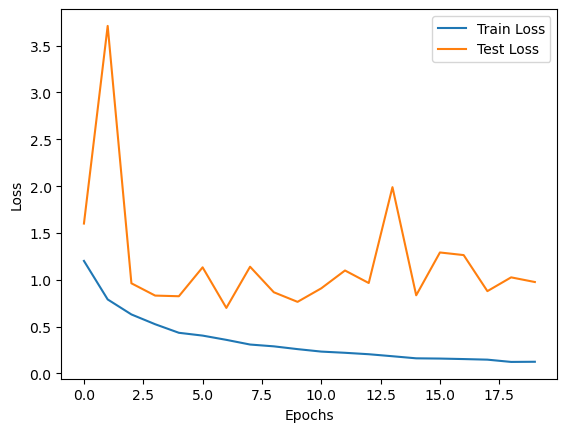

In [13]:
plt.plot(range(20), train_loss, label = "Train Loss")
plt.plot(range(20), test_loss, label = "Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

Train accuracy vs validation accuracy

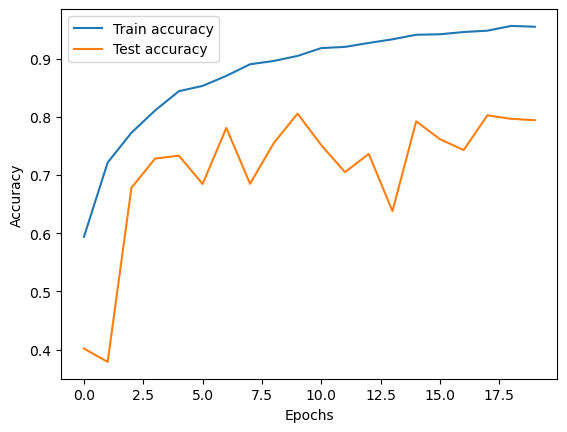

In [14]:
plt.plot(range(20), train_accuracy, label = "Train accuracy")
plt.plot(range(20), test_accuracy, label = "Test accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

# Model peformance demostration

In [15]:
pred_list = [f"archive/seg_pred/seg_pred/{i}" for i in os.listdir("archive/seg_pred/seg_pred")]

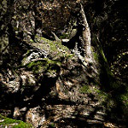

Model Prediction:  forest


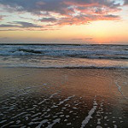

Model Prediction:  sea


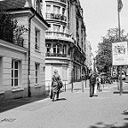

Model Prediction:  street


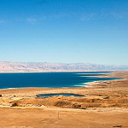

Model Prediction:  sea


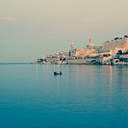

Model Prediction:  sea


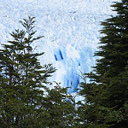

Model Prediction:  sea


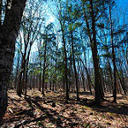

Model Prediction:  forest


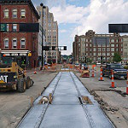

Model Prediction:  street


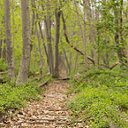

Model Prediction:  forest


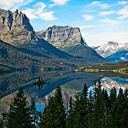

Model Prediction:  mountain


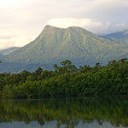

Model Prediction:  mountain


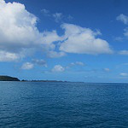

Model Prediction:  sea


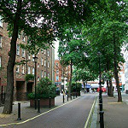

Model Prediction:  forest


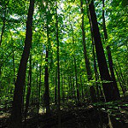

Model Prediction:  forest


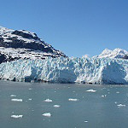

Model Prediction:  glacier


In [16]:
for i in range(15):
  num = randint(0, len(pred_list))
  img = Image.open(pred_list[num])
  img = img.resize((128,128))
  display(img)
  img_arr = np.array(img)
  img_arr = img_arr[np.newaxis, :]
  img_arr = img_arr.astype("float")
  img_arr = img_gen.standardize(img_arr)
  probability = model(img_arr)
  pred = np.argmax(probability)
  print("Model Prediction: ", idx_to_classes[pred])
  print("=======================================")

In [18]:
import pydot
from keras.utils import plot_model

plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
